The goal of this notebook is to analyze the right paw movements in a reaching and grasping movement. The data will first be visualized in three dimensions from a 3D file, then the data will be analyzed in 3 dimensions except that each component axial component will be analyzed separately. 


In [1]:
%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#import h5py
import os  
#import lmfit
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks, peak_widths, chirp
from math import floor
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import KMeans
#import deeplabcut
from scipy.optimize import curve_fit



In [2]:
#3D dataset 
movement_3dH5 = pd.read_hdf('/Users/carlospineda/Documents/Projects/Code/behavior_training_DLC_DLC_3D_Carlos.h5')
#display(movement_3dH5)

movement_2Dcsv = pd.read_hdf('/Users/carlospineda/Documents/Projects/Code/edit_trian_11065_cam1_04082021_1DLC_resnet50_Reach&GraspMar23shuffle1_100000.h5')
#display(movement_2Dcsv)
movement_rightpaw2D = pd.read_csv('/Users/carlospineda/PycharmProjects/scientificProject/data/bodyparts /data_undistorted_singlereach_leftpaw.csv')
print(movement_rightpaw2D)

movement_slit = pd.read_csv('/Users/carlospineda/PycharmProjects/scientificProject/data/bodyparts /data_undistorted_singlereach_slit.csv')
print(movement_slit)

movement_platform = pd.read_csv('/Users/carlospineda/PycharmProjects/scientificProject/data/bodyparts /data_undistorted_singlereach_platform.csv')
print(movement_platform)

movement_elbow = pd.read_csv('/Users/carlospineda/PycharmProjects/scientificProject/data/bodyparts /data_undistorted_singlereach_elbow.csv')
print(movement_elbow)

movement_snout = pd.read_csv('/Users/carlospineda/PycharmProjects/scientificProject/data/bodyparts /data_undistorted_singlereach_snout.csv')
print(movement_snout)
#2D dataset 
movement_1_2dH5 = pd.read_hdf('/Users/carlospineda/Documents/Projects/Code/behavior_training_DLC_camera-2DLC_resnet50_R&D_DLC_2DJul31shuffle1_70000filtered.h5')
#display(movement_1_2



#add time coordinates 
movement_rightpaw2D['Time'] = range(len(movement_rightpaw2D))
#print(movement_rightpaw2D)


#Only include sets with likelyhood greater than 0.5 
movement_rightpaw2D_filtered = movement_rightpaw2D[movement_rightpaw2D['likelihood']>0.01]
print(movement_rightpaw2D_filtered)


################################




              x           y  likelihood          s
0    253.167584  260.725379    0.733566   0.000000
1    253.142082  260.810504    0.598247   0.033333
2    253.141716  260.669994    0.656850   0.066667
3    253.092864  260.657143    0.655012   0.100000
4    252.816568  260.695520    0.690664   0.133333
..          ...         ...         ...        ...
649  259.215522  263.552974    0.574973  21.633333
650  259.265454  263.467414    0.654783  21.666667
651  259.443565  263.346797    0.735603  21.700000
652  259.563436  263.208102    0.757915  21.733333
653  259.458993  263.133045    0.828646  21.766667

[654 rows x 4 columns]
     Unnamed: 0           x           y  likelihood          s
0             1  227.522071  217.318396    0.402100   0.000000
1             2  227.446821  217.179010    0.399846   0.033333
2             3  227.464852  217.197960    0.422686   0.066667
3             4  227.482415  217.111347    0.413703   0.100000
4             5  227.455703  217.021355    0.3823

In [3]:
#3D visualiaztion of the 3D data set. 

#two do 
  #1 create a video 3D visualization
    
#Isolating the rightpaw and dropping datapoints. 
movement_3dH5_rightpaw = movement_3dH5['DLC_3D_Carlos']['rightpaw'].dropna(axis = 0, how = 'any')
#display(movement_3dH5_rightpaw)

movement_3dH5_rightpaw['Time'] = range(len(movement_3dH5_rightpaw))
#display(movement_3dH5_rightpaw)

x = movement_3dH5_rightpaw['z']
y = movement_3dH5_rightpaw['x']
z = movement_3dH5_rightpaw['y']
T = movement_3dH5_rightpaw['Time']


#Time = movement_3dH5_rightpaw.index()
fig = plt.figure(figsize=(20,20))


ax1 = fig.add_subplot(111, projection='3d') 
ax1.scatter(x,y,z, c = T)
plt.gca().invert_zaxis()
pnt3d = ax1.scatter(x,y,z, c = T)
#Figure out how to plot this rightside up.
plt.colorbar(pnt3d)



#fig.suptitle('Forepaw Trajectory during Reaching Bout in 3D', fontsize=24)
#ax1.set_ylabel('z_component(in pixels)')
#ax1.set_xlabel('x-component(in pixels)')
#ax1.set_zlabel('y-component(in pixels)')
ax1.view_init(10, -70)
#ax1.plot_wireframe(x, y, z, rstride=5, cstride=5)
ax1.set_xlabel('chamber right wall  ', fontsize = 35)
ax1.set_ylabel('chamber front', fontsize = 35)
ax1.set_zlabel('chamber left wall', fontsize = 35)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_zticklabels([])
ax1.grid()
#plot a plane within the graph. 

ax1.plot([5, 5], [1, 3], [-3,-3], color='black')
ax1.plot([5, 5], [1, 3], [-4,-4], color = 'black')
ax1.plot([5, 5], [1.25, 1.25], [-4,-3], color = 'black')
ax1.plot([5, 5], [2.5, 2.5], [-4,-3], color = 'black')
ax1.plot([5, 5], [1.75, 1.75], [-4,-3], color = 'black')
ax1.plot([5, 5], [2.25, 2.25], [-4,-3], color = 'black')
ax1.plot([5, 5], [1.50, 1.50], [-4,-3], color = 'black')
ax1.plot([5, 5], [2.75, 2.75], [-4,-3], color = 'black')
ax1.plot([5, 5], [1.50, 1.50], [-4,-3], color = 'black')
ax1.plot([5, 5], [1, 1], [-4,-3], color = 'black')
ax1.plot([5, 5], [3, 3], [-4,-3], color = 'black')
ax1.plot([5, 5], [1, 1.75], [-3,-3], color='black')
ax1.plot([5, 5], [1, 3], [-4,-4], color = 'black')

# for angle in range(0, 360):
#     ax1.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
plt.savefig("Fig_3Dreaching_right_fortime.svg", format='svg')



In [4]:
#interactive 3D plot- you can also figure out how to plot it over time somehow. 

In [5]:
#2D individual component visualization of the data 
#2d deconstruction 
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe, bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!
    x_y_coords = pd.DataFrame()
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        x_coords = Dataframe[scorer][bp]['x'].values[Index]
        y_coords = Dataframe[scorer][bp]['y'].values[Index]
        
        
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',alpha=alphavalue)
        
    z = np.polyfit(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index], 4)
   # plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index], '.')
    xx = np.linspace(np.min(Dataframe[scorer][bp]['x'].values[Index]),np.max(Dataframe[scorer][bp]['x'].values[Index]))
    yy = np.polyval(z, xx)
    plt.plot(xx, yy)
    plt.gca().invert_yaxis()
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    #cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    #cbar.set_ticklabels(bodyparts2plot)
    plt.title("rightpaw trajectory in 2D")
    plt.ylabel("y-component")
    plt.xlabel('x-component')
    
   

['rightpaw']


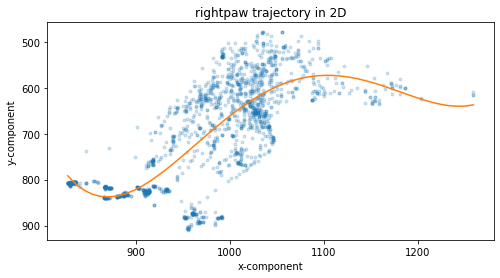

In [6]:
bodyparts=movement_1_2dH5.columns.get_level_values(0)
#print(bodyparts)
#you can read out the header to get body part names!

bodyparts2plot=bodyparts=['rightpaw']
print(bodyparts2plot)
#you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(movement_1_2dH5,bodyparts2plot,alphavalue=.2,pcutoff=.8,fs=(8,4))
plt.savefig('reaching_2D.svg', format = 'svg')

In [7]:
#point  = np.array([1, 2, 3])
#normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
#d = -point.dot(normal)

# create x,y
#xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
#z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
#plt3d = plt.figure().gca(projection='3d')
#plt3d.plot_surface(xx, yy, z)
#plt.show()

0       0.000000
1       0.033333
2       0.066667
3       0.100000
4       0.133333
         ...    
649    21.633333
650    21.666667
651    21.700000
652    21.733333
653    21.766667
Name: s, Length: 654, dtype: float64


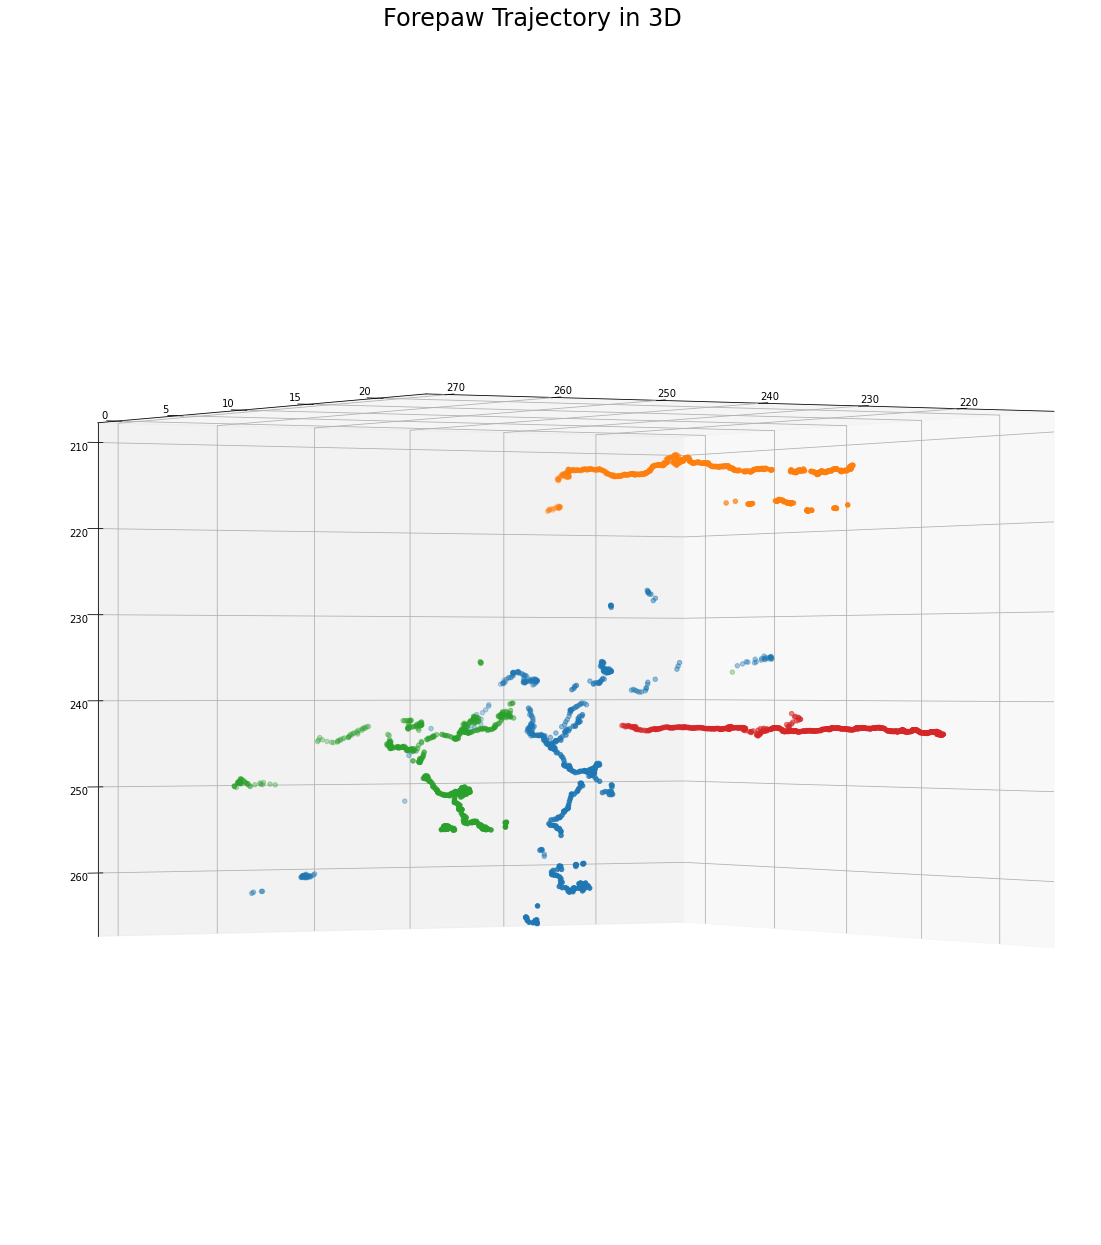

In [8]:
#Time varying trajectory of the forepaw. There is a reaching bout between 500 and 1500 frames that need to be extracted. 

x = movement_rightpaw2D_filtered['x']
z = movement_rightpaw2D_filtered['y']
y = movement_rightpaw2D_filtered['s']

#movement_slit
x_slit = movement_slit['x']
z_slit = movement_slit['y']
y_slit = movement_slit['s']

#movement_elbow 
x_elbow = movement_elbow['x']
z_elbow = movement_elbow['y']
y_elbow = movement_elbow['s']

x_platform = movement_platform['x']
z_platform = movement_platform['y']
y_platform = movement_platform['s']

x_snout = movement_snout['x']
z_snout = movement_snout['y']
y_snout = movement_snout['s']

#x = movement_
print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.scatter(x,y,z)
pnt3d_slit = ax1.scatter(x_slit, y_slit, z_slit)
pnt3d_selbow=ax1.scatter(x_elbow,y_elbow, z_elbow)
#pnt3d_elbow=ax1.scatter(x_snout,y_snout, z_snout)
pnt3d_platform = ax1.scatter(x_platform, y_platform, z_platform)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
#cbar = plt.colorbar(pnt3d_slit)
#cbar = plt.colorbar(pnt3d_elbow)
#cbar = plt.colorbar(pnt3d_platform)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
ax1.view_init(0, 60)

plt.savefig("3D_reaching_time.svg", format='svg')

Empty DataFrame
Columns: [x, y, likelihood, s, Time]
Index: []


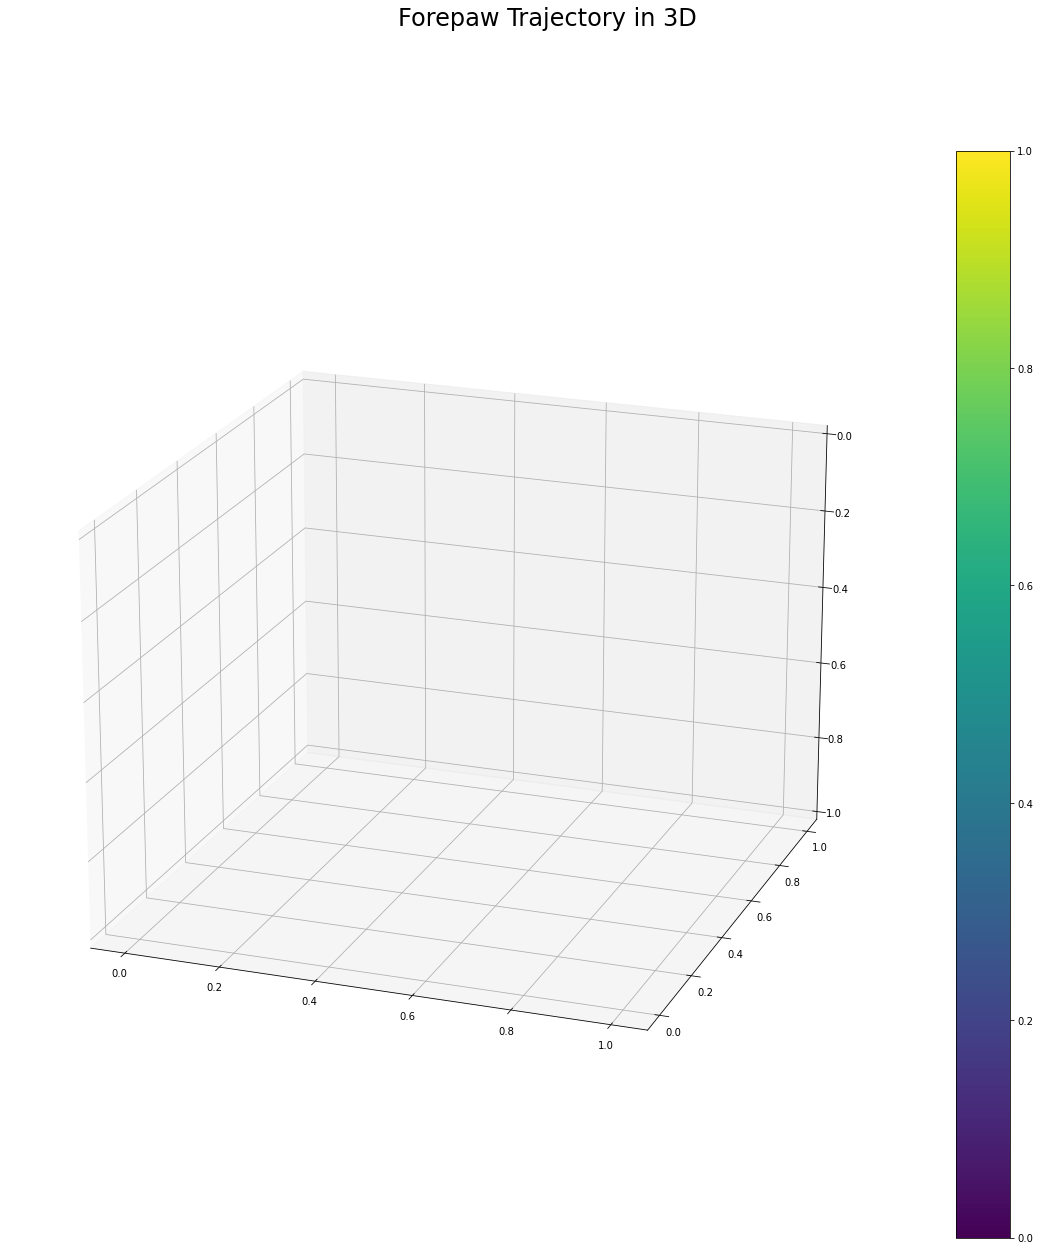

In [9]:
#Extraction of reaching bouts beyond 1050 x-coordinates. 
#for reference 
#display(movement_rightpaw2D_filtered)

#filtering: Filter rows where the x component is greater than 1050 units 
filter_int = 1100
movement_2D_reachfiltered = movement_rightpaw2D_filtered[movement_rightpaw2D_filtered['x'] > filter_int]
print(movement_2D_reachfiltered)

x_filter = movement_2D_reachfiltered['x']
z_filter = movement_2D_reachfiltered['y']
y_filter = movement_2D_reachfiltered['Time']
#print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.scatter(x_filter,y_filter,z_filter) #c=y_filter)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
ax1.view_init(20, -70)

#plt.savefig("3D_reaching_time_filter.svg", format='svg')


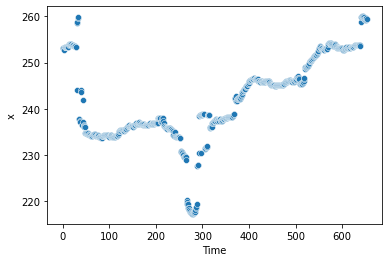

In [10]:
#plot the x axis for the filtered data 

#plt.scatter(movement_2D_reachfiltered['x'],movement_2D_reachfiltered['Time'])
#plt.scatter(movement_2D_reachfiltered['y'])
axPre = sns.scatterplot(x='Time', y = 'x', data = movement_rightpaw2D_filtered )
axPre.xaxis.set_major_formatter(ticker.ScalarFormatter())


#this plot looks a little weird. I think because there isnt points on every time coord point and so the linear interpolation looks weird



,x,y,likelihood,s,Time


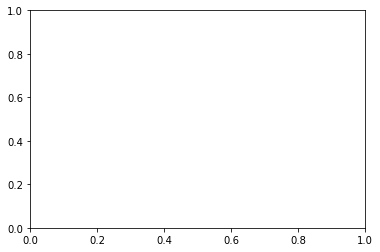

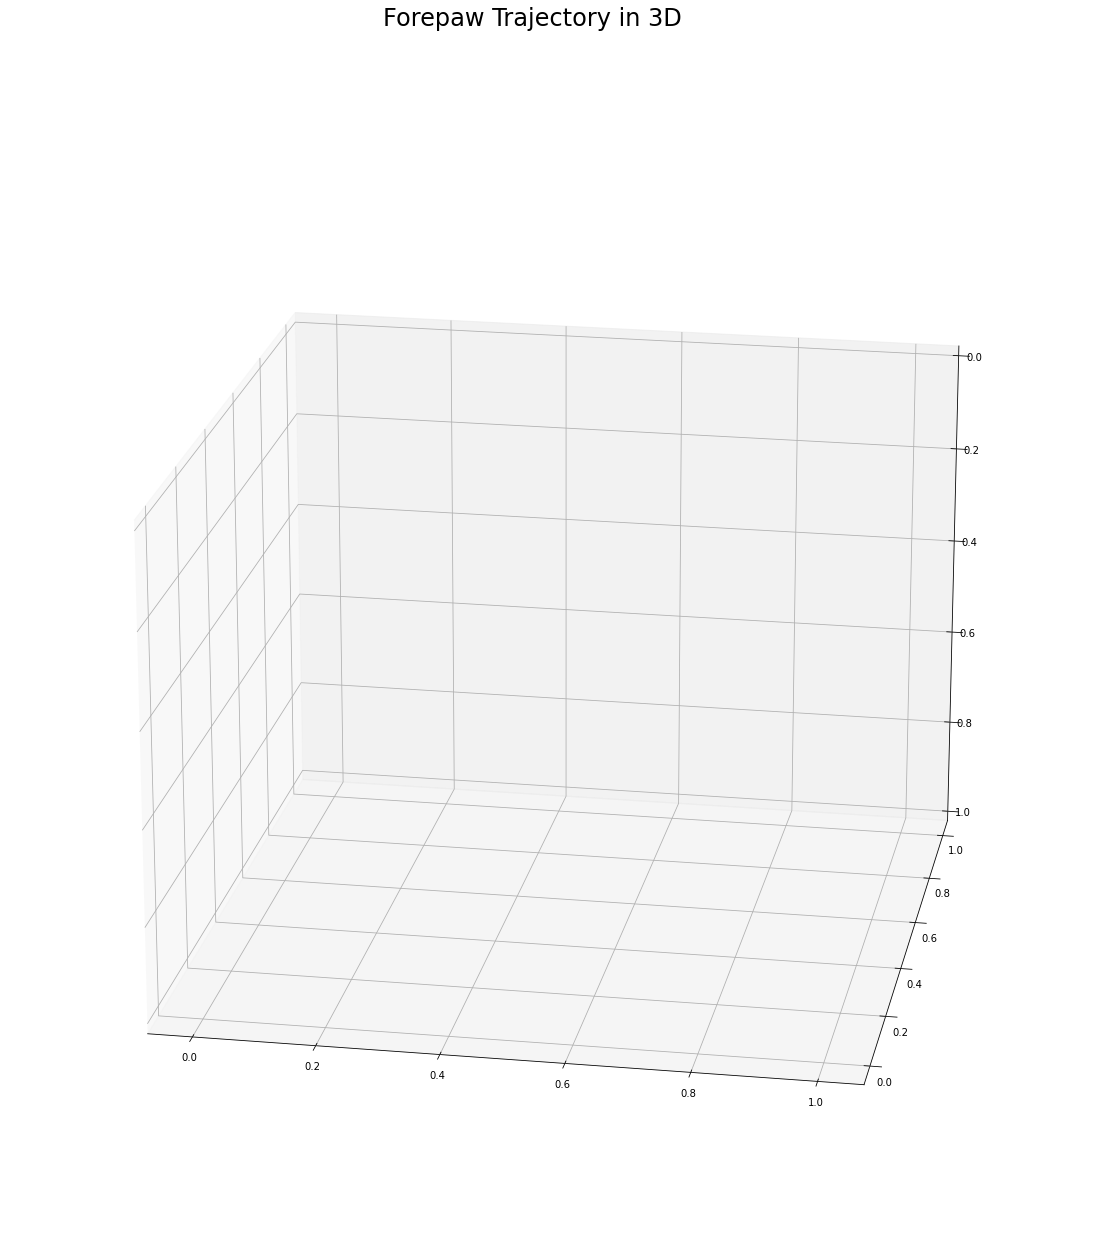

In [11]:
#Maybe looks better if the ROI is chunked by time, rather than coordinates. 

#SLicing rows. 
movement_2D_rightpaw_byrows = movement_rightpaw2D_filtered[800:1500]
display(movement_2D_rightpaw_byrows)
#matploptlib plotting solution
#plt.scatter(movement_2D_rightpaw_byrows['Time'], movement_2D_rightpaw_byrows['x'])

#sns scatter solution
axSNS = sns.scatterplot(x='Time', y = 'x', data = movement_2D_rightpaw_byrows)
axSNS.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show

x_filter = movement_2D_rightpaw_byrows['x']
z_filter = movement_2D_rightpaw_byrows['y']
y_filter = movement_2D_rightpaw_byrows['Time']
#print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.scatter(x_filter,y_filter,z_filter) #c=y_filter)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
ax1.view_init(20, -80)




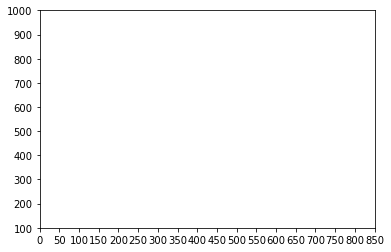

In [12]:
#processing reaching events using Mac's code
from scipy.ndimage import gaussian_filter1d
data = movement_2D_rightpaw_byrows
#print(data)

#select x column from the dataframe and put it in rflx - are the inices conserved? Yes
rflx = data.x
#print(rflx)

#Smoothing the peaks: Are the original indeces conserved?No.  Well, this spits a list object. 
rflx_blur = gaussian_filter1d(rflx, sigma = 2)
#print(rflx_blur)

from scipy.signal import find_peaks 
x= rflx_blur
#print(x)


peaks, _ = find_peaks(x, height = 0.5, distance = 25)
#print(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "X")
plt.xticks(np.arange(0, 900, step = 50))
plt.ylim(100, 1000)
plt.show()


In [13]:
#remove peaks: from Mac
list_peaks = peaks.tolist()
#print(list_peaks)
list_peaks.remove(547)
list_peaks.remove(606)
list_peaks.remove(648)
list_peaks.remove(685)
print(list_peaks)

ValueError: list.remove(x): x not in list

Because the function "gaussian_filter" spits a list, the indeces created afterwards reset and start from 0. This mean that in the next step, when we are extracting the data from the original dataframe, it will not find the data. 

What has to happen is somethig like count 24 indices from the 999 for example. You can also add the start of the index to every item of the list so that they will be scaled to the original data. 

******This worked but you cannot trust the index from find_peaks- they do not share the same spatial relationshp from the original data. 

*******The list from gaussian_filter does not conserve the original index- so even if you add the beginning of your dataframe's index to the new index, it does not align with the original data. The best way is to analyze data output from "gaussian_filter" line. 


In [ ]:

#modify the list of peak indices to 
list_peaks_modded = []
#print(type(list_peaks_modded))
for indice in list_peaks:
    new_indice = indice + data['coords'].iloc[0]
    #print(new_indice)
    list_peaks_modded.append(new_indice)
print(list_peaks_modded)

In [ ]:
#Alternative 
list_peaks_modded = data.reset_index()
print(list_peaks_modded)

In [ ]:
##### As of rightnow, you cannot index into the original dataframe. There is some correspondence, but it's not complete, so you loose some data. 
# make a new DataFrame based on data, but containing only the data range we want:from Mac


data_filtered = pd.DataFrame(columns = data.columns)
#currently this is not doing anythin
for indice in list_peaks: 
    #print(indice)
    f = list_peaks_modded.loc[indice - 36: indice +35]
    #print(f)
    data_filtered = data_filtered.append(f)
#We are loosing some peaks before this step. 

#print(data_filtered)
val = 0 
data_filtered['reach'] = [val + floor(i / 100) for i in range(len(data_filtered.index))] 
listit = list(range(71))
#print(len(data_filtered))
#data_filtered['y_vals']

#So this method is not good because it requires you to match the listit variable to the size of the dataframe indeces. 
#It becomes a trial and error game. 
# now we want to add x_values so we can align each strike 
data_filtered['y_vals'] = np.tile(listit,len(list_peaks)) #or use c_frame if using other method 
#print(len(n))
print(data_filtered)
sns.lineplot(x="Time", y="x", hue="reach",data=data_filtered, legend = False)

In [ ]:
#Grouping strikes. 

def func(single_group_data):
    x_displacement = single_group_data['x'].max() - single_group_data['x'].min()
    x_disp = round(x_displacement,0)
    #single_group_data['RFLx_align'] = np.linspace(0,x_disp,num = len(single_group_data))# for evevnly spaced use this
    single_group_data['RFLx_diff'] = single_group_data['x'] - single_group_data['x'].shift()
    single_group_data['RFLx_cumsum'] = single_group_data.RFLx_diff.cumsum()
    
    
    # now this should do the x component for snout 
    #single_group_data['Snoutx_diff'] = single_group_data['Snoutx'] - single_group_data['Snoutx'].shift()
    #single_group_data['Snoutx_cumsum'] = single_group_data.Snoutx_diff.cumsum()
    
    #LFL, RHL, LHL, Tail:
    #single_group_data['LFLx_diff'] = single_group_data['LFLx'] - single_group_data['LFLx'].shift()
    #single_group_data['LFLx_cumsum'] = single_group_data.LFLx_diff.cumsum()
    
    #single_group_data['RHLx_diff'] = single_group_data['RHLx'] - single_group_data['RHLx'].shift()
    #single_group_data['RHLx_cumsum'] = single_group_data.RHLx_diff.cumsum()
    
    #single_group_data['LHLx_diff'] = single_group_data['LHLx'] - single_group_data['LHLx'].shift()
    #single_group_data['LHLx_cumsum'] = single_group_data.LHLx_diff.cumsum()
    
    #single_group_data['Tailtipx_diff'] = single_group_data['Tailtipx'] - single_group_data['Tailtipx'].shift()
    #single_group_data['Tailtipx_cumsum'] = single_group_data.Tailtipx_diff.cumsum()
    
    return single_group_data

# create vectors if applicable
d_rflx_align = data_filtered.groupby('reach').apply(func)
display(d_rflx_align)
d_rflx_align['RFL_vector'] = (d_rflx_align.RFLx_cumsum**2) + (d_rflx_align.y**2)
d_rflx_align['RFL_vector'] = (d_rflx_align.RFL_vector**.5)
#print(d_rflx_align)

# now plot the lined-up peaks separate
sns.lineplot(x="coords", y="x",hue = 'reach',data=d_rflx_align,palette='coolwarm')
plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFLy_disp', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=1, prop={'size': 19})

#plt.savefig('Test_Forelimb_Aligned.pdf') 
plt.savefig('star_all_stacked.pdf')

From this point on, the data will be new from a current data set that is being trained. This data set is only valid for movements of the ears and movements of the ears - thus we could potential calculate the position of the nose during a reaching event. 

This data will be treated in a similar way as the data before. First 2D-time invariant. Second,  Time variand 3D and third if time permits a 3D plot that is time variant and time invariant. 

In [ ]:
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

six_strike = d_rflx_align.loc[d_rflx_align.reach == 6].copy()
six_strike['new_index'] = range(len(six_strike))
six_strike = six_strike.reset_index()

six_strike = six_strike[50:1830]
display(six_strike)
sns.scatterplot(x='new_index', y="x",data=six_strike, legend = False)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('x_displacement', fontsize=20)

x = six_strike['new_index']
y = six_strike['x']

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=50, cen=70, wid=1)

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()





In [ ]:
sns.scatterplot(x='new_index', y="y",data=six_strike, legend = False)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('y_displacement', fontsize=20)

In [ ]:
x_filter = six_strike['x']
z_filter = six_strike['y']
y_filter = six_strike['Time']
#print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.plot(x_filter,y_filter,z_filter, ':', color = 'red') #c=y_filter)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
#ax1.view_init(20, -70)
plt.setp(pnt3d, linewidth=4)

for angle in range(0, 360):
    ax1.view_init(30, angle)
    plt.draw()
    plt.pause(.001)


In [ ]:
seven_strike = d_rflx_align.loc[d_rflx_align.reach == 3].copy()
seven_strike = seven_strike.reset_index()
seven_strike['new_index'] = range(len(seven_strike))
seven_strike = seven_strike[60:100]
#print(seven_strike)
sns.scatterplot(x='new_index', y="x",data=seven_strike, legend = False)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('x_displacement', fontsize=20)

In [ ]:
x_filter = seven_strike['x']
z_filter = seven_strike['y']
y_filter = seven_strike['Time']
#print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.plot(x_filter,y_filter,z_filter) #c=y_filter)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
#ax1.view_init(20, -70)

for angle in range(0, 360):
    ax1.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [ ]:
seven_strike = d_rflx_align.loc[d_rflx_align.reach == 2].copy()
seven_strike = seven_strike.reset_index()
seven_strike['new_index'] = range(len(seven_strike))
seven_strike = seven_strike[55:80]
#print(seven_strike)
sns.scatterplot(x='new_index', y="x",data=seven_strike, legend = False)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('x_displacement', fontsize=20)

In [ ]:
x_filter = seven_strike['x']
z_filter = seven_strike['y']
y_filter = seven_strike['Time']
#print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.plot(x_filter,y_filter,z_filter) #c=y_filter)
plt.gca().invert_zaxis()
#plt.gca().invert_yaxis()
#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
#ax1.view_init(20, -70)

for angle in range(0, 360):
    ax1.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [ ]:
#New data analysis
bodyparts=movement_2Dcsv.columns.get_level_values(0)
print(bodyparts)
display(type(bodyparts))
bodyparts2plot=bodyparts=['Snout', 'Ear1', 'Ear2', 'Hindpaw2', 'Hindpaw1']
#you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(movement_2Dcsv,bodyparts2plot,alphavalue=.1,pcutoff=.2,fs=(8,4))
#plt.savefig('reaching_2D.svg', format = 'svg')

In [ ]:
#Headless 3D and Time plotting
#Time

y = movement_2Dcsv_headless_rightpaw['x']
z = movement_2Dcsv_headless_rightpaw['y']
x = movement_2Dcsv_headless_rightpaw['Time']
print(y)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(111, projection='3d') 
pnt3d=ax1.scatter(x,y,z)

#Figure out how to plot this rightside up.
#cbar=plt.colorbar(pnt3d)
fig.suptitle('Forepaw Trajectory in 3D', fontsize=24)
ax1.view_init(20, 50)

plt.savefig("3D_reaching.svg", format='svg')